In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:

data = pd.read_csv("rimini_climate.txt", sep=",")

In [7]:
print("----------------\nData exploration\n----------------")
print(data.info())
print(data.describe())
print(data.shape)
print(data.head(5))
print("----------------")

----------------
Data exploration
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920430 entries, 0 to 920429
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      920430 non-null  int64  
 1   min_temp  920430 non-null  float64
 2   max_temp  920430 non-null  float64
 3   temp      920430 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 28.1 MB
None
               date       min_temp       max_temp           temp
count  9.204300e+05  920430.000000  920430.000000  920430.000000
mean   1.990568e+07       8.829380      17.349964      13.089737
std    1.731816e+05       6.731109       8.276298       7.331018
min    1.961010e+07     -16.700000     -11.100000     -12.000000
25%    1.976010e+07       3.400000      10.700000       7.000000
50%    1.991010e+07       9.000000      17.400000      13.100000
75%    2.006010e+07      14.300000      24.200000      19.200000
max    2.020123e+07    

In [8]:
data = data.drop(columns=["min_temp", "max_temp"])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.reset_index(drop=True, inplace=True)
data = data.set_index("date")

In [9]:
print("----------------\nData after drop min_temp, max_temp\n----------------")
print(data.head(5))
print("----")

----------------
Data after drop min_temp, max_temp
----------------
            temp
date            
1961-01-01   1.5
1961-01-02   3.4
1961-01-03   3.1
1961-01-04   3.4
1961-01-05   3.3
----


<Axes: xlabel='date'>

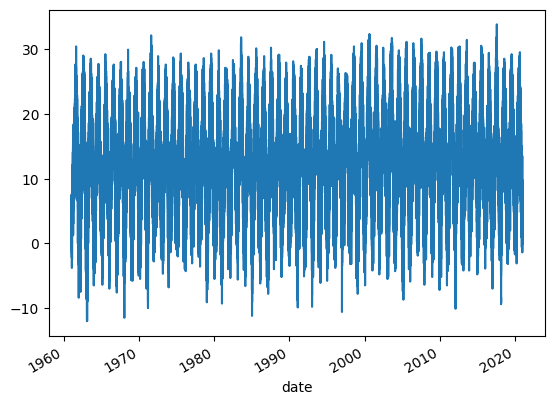

In [10]:
data['temp'].plot()

In [11]:
# check data distribution
A, M, R, STD = data["temp"].median(), data["temp"].mean(), data["temp"].max() - data["temp"].min(), data["temp"].std()
print(A,M,R, STD)
# 68-95-99.7 rule
# 68 % of data are A - STD <= x <= a + STD

perc68 = sum((data["temp"] >= A - STD) & (data["temp"] <= A + STD)) / len(data["temp"])
print(f"{round(perc68 * 100, 2)}% of data lie between {A - STD} and {A + STD} - Test {'failed' if perc68 < 0.68 else 'passed'}")

# check if 95 % of data are A - 2STD <= x <= A + 2STD
perc95 = sum((data["temp"] >= A - (2*STD)) & (data["temp"] <= A + (2*STD))) / len(data["temp"])
print(f"{round(perc95 * 100, 2)}% of data lie between {A - 2*STD} and {A + 2*STD} - Test {'failed' if perc95 < 0.95 else 'passed'}")

# 99.7 % of data are A - 3STD <= x <= A + 3STD
perc997 = sum((data["temp"] >= A - (3*STD)) & (data["temp"] <= A + (3*STD))) / len(data["temp"])
print(f"{round(perc997 * 100, 2)}% of data lie between {A - 3*STD} and {A + 3*STD} - Test {'failed' if perc997 < 0.997 else 'passed'}")

13.1 13.089736536184175 45.8 7.3310184919617605
61.26% of data lie between 5.768981508038239 and 20.43101849196176 - Test failed
98.42% of data lie between -1.5620369839235213 and 27.762036983923522 - Test passed
99.99% of data lie between -8.893055475885282 and 35.09305547588528 - Test passed


In [12]:
z_score = (np.sort(data["temp"]) - A) / STD
print(z_score[:10])

[-3.42380803 -3.42380803 -3.35560469 -3.31468268 -3.30104201 -3.27376067
 -3.26012    -3.24647933 -3.24647933 -3.23283866]


In [13]:
from scipy.stats import norm
cum_z_scores = norm.cdf(z_score)

print(cum_z_scores[len(data["temp"] )// 2])

0.5


In [14]:
"""
    siccome abbiamo un dataset di temperature e di solito i fenomeni naturali seguono una distribuzione gaussiana,
    abbiamo eseguito i test di normalità per verificare questo fatto
"""


'\n    siccome abbiamo un dataset di temperature e di solito i fenomeni naturali seguono una distribuzione gaussiana,\n    abbiamo eseguito i test di normalità per verificare questo fatto\n'

<Axes: >

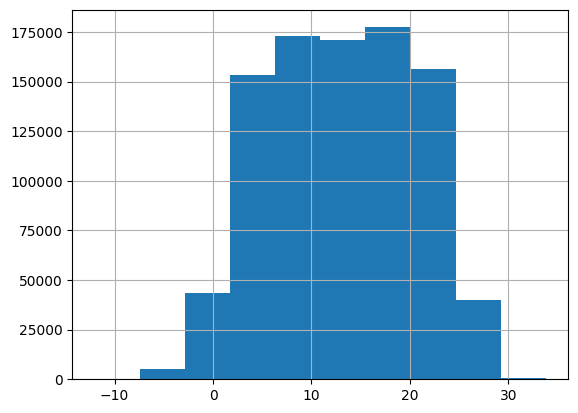

In [15]:
pd.Series(data["temp"]).hist()

In [16]:
tot_years = 2021 -1961

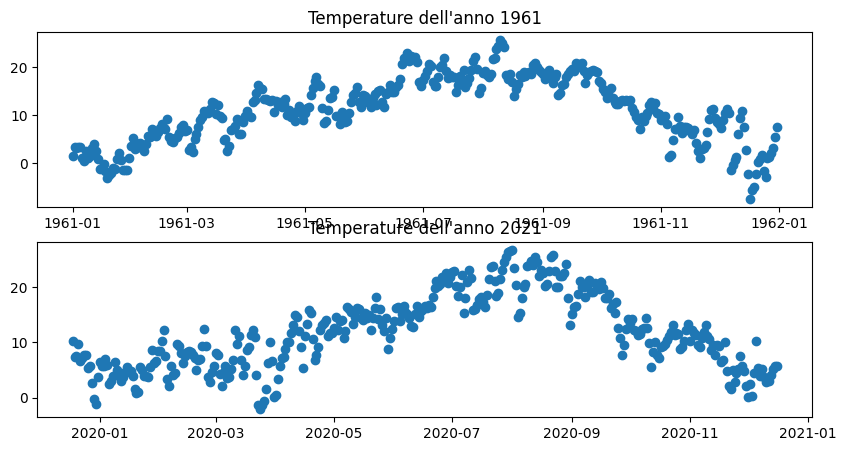

In [17]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches((10, 5))
axs[0].set_title("Temperature dell'anno 1961")
axs[1].set_title("Temperature dell'anno 2021")
axs[0].scatter(x = data.index[:365],  y = data["temp"][:365])
axs[1].scatter(x = data.index[(365*(tot_years-1)):(365*tot_years)],  y = data["temp"][365*(tot_years-1):(365* tot_years)])
plt.show()

In [18]:
# raggruppiamo le temperature ottenute in zone diverse di Rimini per lo stesso giorno aggregandole con la media
data["month"] = data.index.month
data["year"] = data.index.year

year        1961       1962       1963       1964       1965       1966  \
month                                                                     
1       2.742627   4.828802  -0.369662   0.995084   4.131720   1.127880   
2       7.386990   4.199745   0.781037   4.729310   2.047364   8.537160   
3      10.025653   4.953917   7.032335   7.524501   7.577880   7.976421   
4      14.488333  11.244286  12.400159  12.888095   9.773889  13.097857   
5      15.852611  15.573195  16.082873  16.662289  14.849078  15.538710   
6      20.266667  18.824603  20.214921  20.955000  19.037063  20.158254   
7      21.415745  21.775422  22.569124  21.525730  22.036252  21.250538   
8      22.357296  24.360522  21.842089  21.232181  20.498310  21.515054   
9      20.619365  19.520794  18.919841  18.211032  17.223651  19.470714   
10     15.363287  14.139017  13.245392  12.948157  13.462442  16.533333   
11      9.101429   7.843333  12.927857   8.304603   9.241905   7.436190   
12      4.326267   2.4946

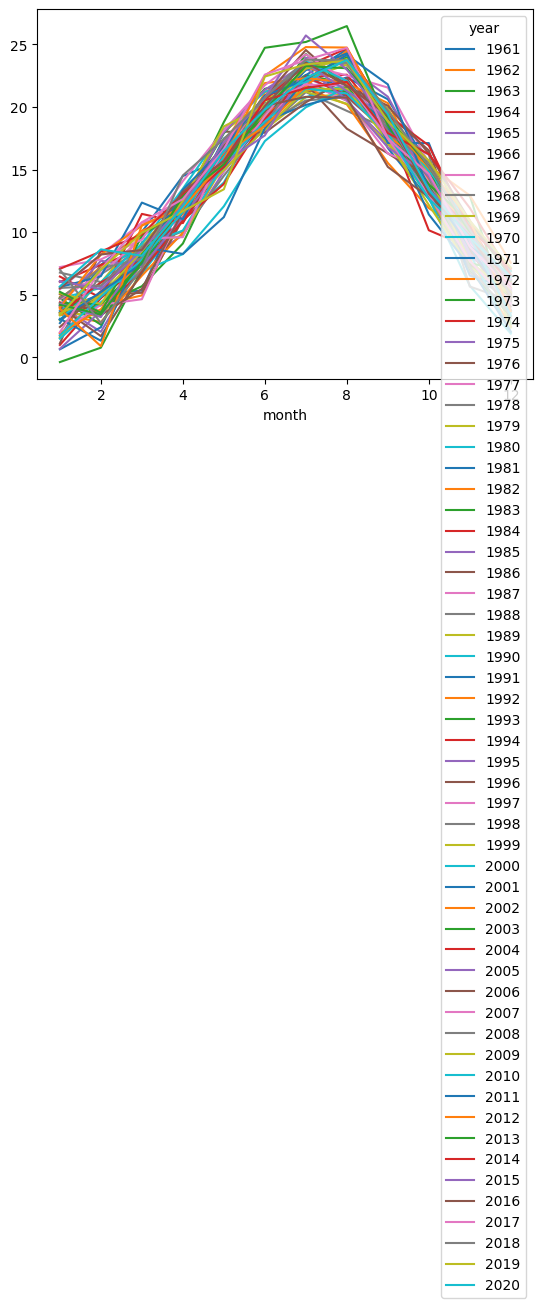

In [19]:
# aggreghiamo le informazioni 
pivot_month = pd.pivot_table(data, values = "temp", index="month", columns="year", aggfunc="mean")
print(pivot_month)
pivot_month.plot()
plt.show()

In [20]:
data

,temp,month,year
date,,,
1961-01-01,1.5,1,1961
1961-01-02,3.4,1,1961
1961-01-03,3.1,1,1961
1961-01-04,3.4,1,1961
1961-01-05,3.3,1,1961
...,...,...,...
2020-12-27,3.3,12,2020
2020-12-28,6.1,12,2020
2020-12-29,8.9,12,2020


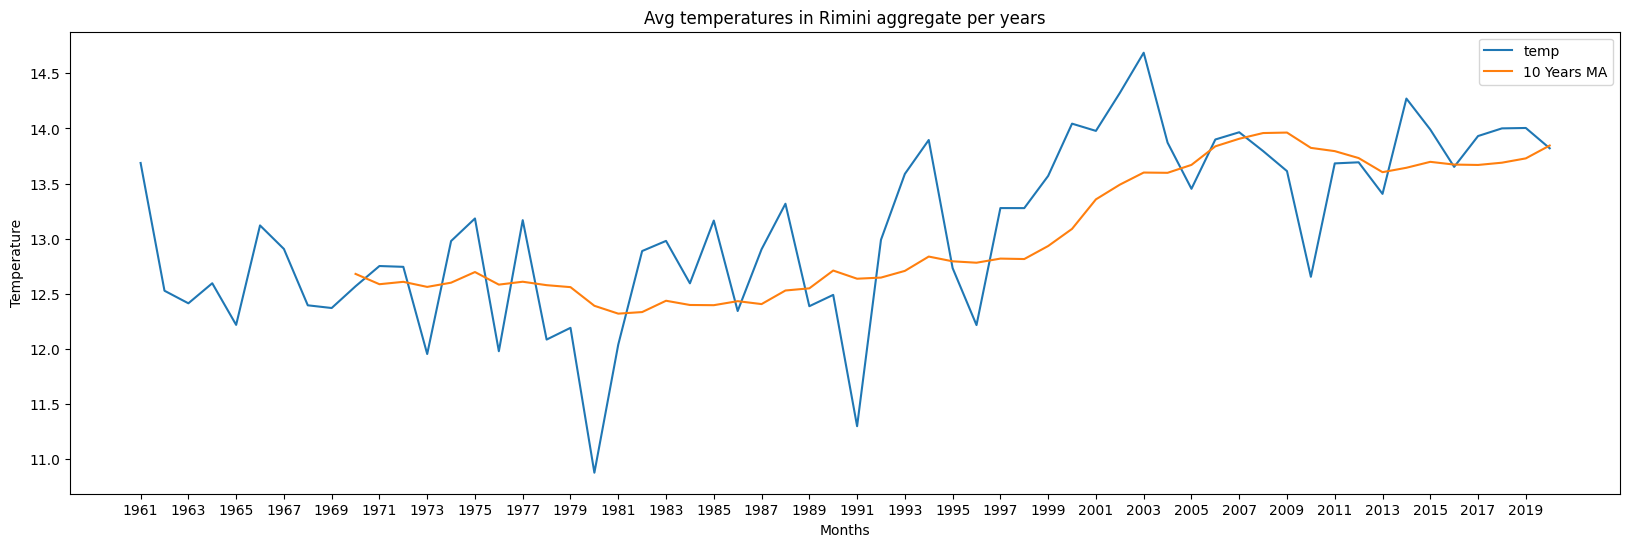

In [21]:
year_avg = pd.pivot_table(data, values='temp', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['temp'].rolling(10).mean()
year_avg[['temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Avg temperatures in Rimini aggregate per years')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1961,2021,2)])
plt.show()

In [22]:
# come ci si poteva aspettare notiamo un trend crescente per la temperatura media annuale 

In [23]:
pivot_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1961    12 non-null     float64
 1   1962    12 non-null     float64
 2   1963    12 non-null     float64
 3   1964    12 non-null     float64
 4   1965    12 non-null     float64
 5   1966    12 non-null     float64
 6   1967    12 non-null     float64
 7   1968    12 non-null     float64
 8   1969    12 non-null     float64
 9   1970    12 non-null     float64
 10  1971    12 non-null     float64
 11  1972    12 non-null     float64
 12  1973    12 non-null     float64
 13  1974    12 non-null     float64
 14  1975    12 non-null     float64
 15  1976    12 non-null     float64
 16  1977    12 non-null     float64
 17  1978    12 non-null     float64
 18  1979    12 non-null     float64
 19  1980    12 non-null     float64
 20  1981    12 non-null     float64
 21  1982    12 non-null     float64
 22  1983    1

In [24]:
data

,temp,month,year
date,,,
1961-01-01,1.5,1,1961
1961-01-02,3.4,1,1961
1961-01-03,3.1,1,1961
1961-01-04,3.4,1,1961
1961-01-05,3.3,1,1961
...,...,...,...
2020-12-27,3.3,12,2020
2020-12-28,6.1,12,2020
2020-12-29,8.9,12,2020


In [25]:
# prima di procedere con il training dei modelli aggreghiamo i dati per mese tramite media
group_df = data.groupby(["year", "month"])["temp"].mean().reset_index(name ='temp')
group_df
print(group_df)

     year  month       temp
0    1961      1   2.742627
1    1961      2   7.386990
2    1961      3  10.025653
3    1961      4  14.488333
4    1961      5  15.852611
..    ...    ...        ...
715  2020      8  23.750154
716  2020      9  19.433016
717  2020     10  13.385100
718  2020     11   9.565714
719  2020     12   6.431951

[720 rows x 3 columns]


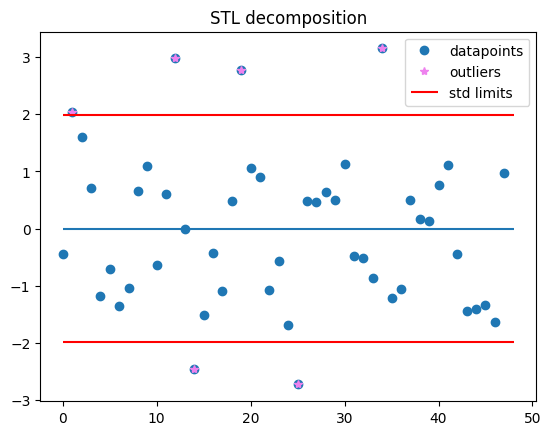

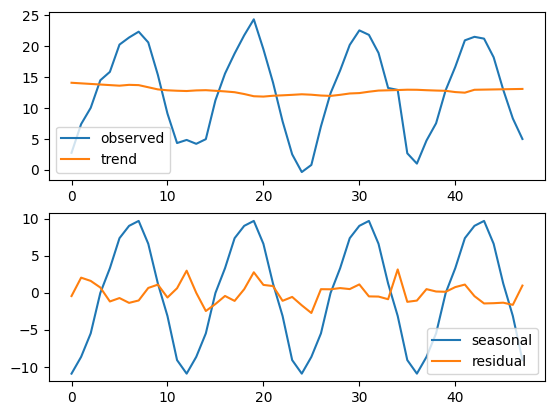

In [26]:
# search for outliers: STL decomposition
# study the residuals and seasonality
# seasonal_decompose with extrapolate_trend='freq' to avoid NaNs, a sort of data augmentation
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(group_df['temp'][:48], model='additive', period=12, extrapolate_trend='freq')
observed = result.observed
trend = result.trend
seasonal = result.seasonal
resid = result.resid
std = resid.std()
plt.plot(resid, "o", label="datapoints")
outliers = pd.Series(resid)
outliers = pd.concat([outliers[outliers < (-1.5 * std)], outliers[outliers > (1.5 * std)]])
plt.plot(outliers, "*", color='violet', label="outliers")
plt.hlines(0, 0, len(resid))
plt.hlines(1.5 * std, 0, len(resid), color="red", label="std limits")
plt.hlines(-1.5 * std, 0, len(resid), color="red")
plt.title('STL decomposition')
plt.legend()
plt.show()
plt.subplot(2, 1, 1)
plt.plot(observed, label='observed')
plt.plot(trend, label='trend')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(seasonal, label='seasonal')
plt.plot(resid, label='residual')
plt.legend()
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import math
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rimini Temperatures')
    plot_acf(x= y, lags=lags_plots, zero=False, ax=ax2)
    
    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest[f"Critical Value {key}"] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -4.1880
p-value                          0.0007
Lags Used                       20.0000
Number of Observations Used    699.0000
Critical Value 1%               -3.4397
Critical Value 5%               -2.8657
Critical Value 10%              -2.5690
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


/tmp/ipykernel_111229/893179353.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adftest[0].round(2) < adftest[5].round(2):


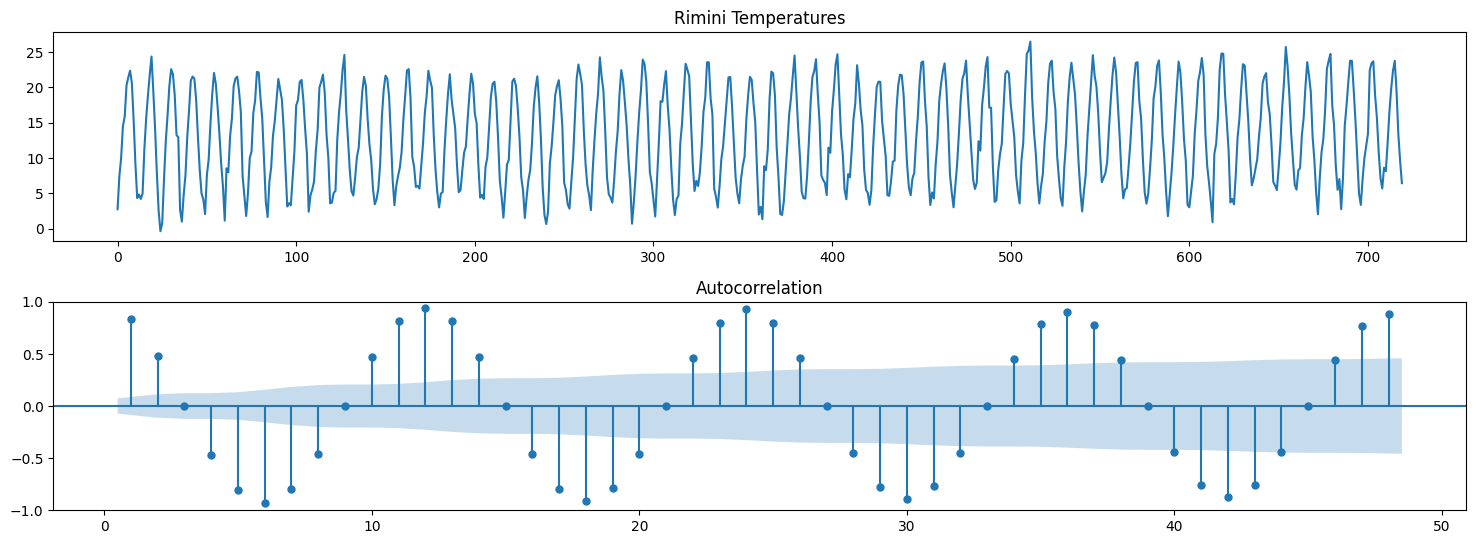

In [27]:
check_stationarity(group_df["temp"])

<Axes: >

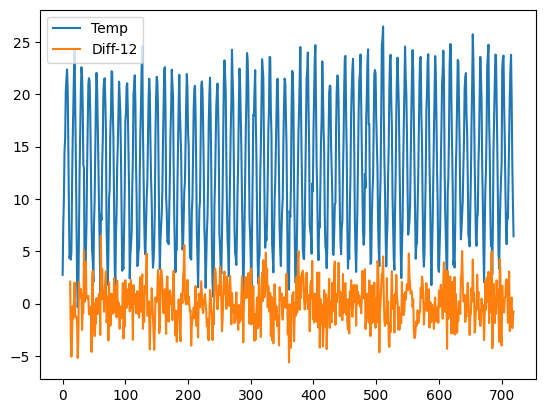

In [28]:
group_df["temp"].plot(label="Temp",legend=True)
group_df["temp"].diff(12).plot(label="Diff-12",legend=True)


### PREDICTION AND FORECASTING

In [28]:
serie = group_df["temp"].values
i = int(len(serie) * 0.9) # 54 anni per il train
j = int(len(serie) * 0.1) # 6 anni per il test

train, test = serie[:i], serie[-j:]
assert(len(train) + len(test) == len(serie))

In [29]:
train_diff = pd.Series(train).diff(12)

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import mse, rmse
import itertools 

In [32]:
def arima_grid_search(data):
    best_params = None
    p = d = q = range(0, 4)
    pdq = list(itertools.product(p, d, q))
    best_aic = float('inf')
    for param in pdq:
        model = ARIMA(data, order = param)
        fitted_model = model.fit()
        if best_aic > fitted_model.aic:
            best_params = param 
            best_aic = fitted_model.aic  
    return best_params          

In [33]:
best_params = arima_grid_search(group_df["temp"])
model = ARIMA(train, order = best_params)
fitted_model = model.fit()
fc_values = fitted_model.forecast(len(test))
mse(fc_values, test)

/home/marco/miniconda3/envs/op/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/marco/miniconda3/envs/op/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/marco/miniconda3/envs/op/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/marco/miniconda3/envs/op/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

KeyboardInterrupt: 

In [ ]:
print(fc_values, test)

[ 4.23459489  4.79207415  7.72450699 12.12301784 16.77104513 20.41172592
 22.06684531 21.2933263  18.2999143  13.89026147  9.24699041  5.61447392
  3.96533368  4.74001254  7.7291439  12.1301313  16.76264838 20.38519673
 22.02782247 21.25182503 18.26692025 13.87456789  9.25277721  5.64017082
  4.00403912  4.78134511  7.76202609 12.14575819 16.75684528 20.35953441
 21.98919201 21.21058737 18.23412735 13.85900071  9.25859445  5.66579796
  4.04259454  4.82248799  7.7947299  12.16126583 16.75101399 20.33394243
 21.95071151 21.16953906 18.20151241 13.84355243  9.26443971  5.69135479
  4.08100025  4.86344193  7.82725619 12.17665494 16.74515486 20.30842071
 21.91238047 21.12867929 18.16907455 13.82822232  9.27031261  5.71684141
  4.11925675  4.90420773  7.85960584 12.19192623 16.73926827 20.28296918
 21.87419838 21.08800727 18.1368129  13.81300967  9.27621279  5.74225787] [ 6.09731183  5.45671769  8.57933948 12.12603175 17.17273425 20.73611111
 25.71574501 22.98402458 18.8868254  13.46390169  

In [ ]:
train_predict = fitted_model.predict(13, len(train_diff))
mse(train_diff[12:].values, train_predict)

213.9811219228883

In [ ]:
test_fc = fitted_model.forecast(len(test))
# Inizializza la serie temporale invertita con il primo valore della serie differenziata
fc_values_inverted = test_fc[:12].tolist()

# Inverti la differenziazione iterativamente
for i in range(12, len(test_fc)):
    fc_values_inverted.append(fc_values_inverted[i-12] + test_fc[i])
mse(fc_values_inverted, test)

234.7381891752208

In [ ]:
import numpy as np
from scipy.optimize import minimize
from statsmodels.tsa.arima.model import ARIMA

def nelder_mead_arima(data):
    # Funzione obiettivo per minimizzare
    def objective(params, data):
        p, d, q = params
        print(params)
        differenced_series = np.diff(data, n=int(d))
        model = ARIMA(differenced_series, order=(int(p), int(d), int(q)))
        fitted_model = model.fit()
        predictions = fitted_model.predict(start=int(d), end=len(differenced_series)-1, dynamic=False)
        mse = ((predictions - differenced_series[int(d):]) ** 2).mean()
        return predictions.mean()
    
    # Valori iniziali dei parametri
    initial_params = [2,0,2]
    
    # Minimizza la funzione obiettivo utilizzando Nelder-Mead
    result = minimize(objective, initial_params, args=(data), method='Nelder-Mead')
    
    # Parametri stimati
    estimated_params = result.x
    print("Parametri stimati:", estimated_params)

In [ ]:
nelder_mead_arima(group_df["temp"])

In [ ]:
group_df.index.array

<NumpyExtensionArray>
[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
 ...
 710, 711, 712, 713, 714, 715, 716, 717, 718, 719]
Length: 720, dtype: int64

In [87]:
from scipy.optimize import curve_fit
def arima_forecast(data, p,d,q):
    model = ARIMA(data, order=(int(p), int(d), int(q)))
    fitted_model = model.fit()
    predictions = fitted_model.predict(len(data), len(data))
    return predictions
params, _ = curve_fit(arima_forecast, np.arange(len(group_df["temp"])), group_df["temp"], p0=(0,0,0))
print(params)

[0. 0. 0.]


In [ ]:
from scipy.optimize import curve_fit

def arima_forecast(data, p,d,q):
    model = ARIMA(data, order=(int(p), int(d), int(q)))
    fitted_model = model.fit()
    predictions = fitted_model.predict(len(data), len(data))
    return predictions
params, _ = curve_fit(arima_forecast, np.arange(len(group_df["temp"])), group_df["temp"], p0=(0,0,0))
print(params)


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# data preprocess
sarima_model = SARIMAX(order=best_params)

NameError: name 'best_params' is not defined

In [2]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

2023-12-19 15:56:25.609020: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 15:56:25.656786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 15:56:25.656818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 15:56:25.657866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 15:56:25.664436: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 15:56:25.664949: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
### MLP PREDICTION

In [31]:
def create_dataset_mlp(data, w):
    x, y = list(), list()
    for i in range(0, len(data)-w):
        x.append(data[i: i+w])
        y.append([data[i+w]])
    return np.array(x), np.array(y)

In [32]:
win = 12
train_x, train_y = create_dataset_mlp(train, win)
testdata = np.concatenate((train[-win:],test))
test_x, test_y = create_dataset_mlp(testdata, win) 

In [37]:
model = Sequential()
model.add(Dense(64, input_dim = win,  activation = "relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(train_x, train_y, epochs=100)
model.summary()

Epoch 1/100


2023-12-19 15:07:07.288488: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


20/20 [==============================] - 1s 3ms/step - loss: 162.3179
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 32.8807
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 8.7826
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.8629
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4582
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3369
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2551
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 3.1901
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 3.1441
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 3.1161
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 3.1061
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 3.0935
Epoch 13/100
20/20 [==========================

In [39]:
trainScore = model.evaluate(train_x, train_y, verbose=0)

In [50]:
testScore = model.evaluate(test_x, test_y, verbose=0)
print(testScore)

403941.53125


In [38]:
mlp_train_predict = model.predict(train_x)
mlp_test_predict = model.predict(test_x)

20/20 [==============================] - 0s 2ms/step


In [39]:
mlp_test_predict = model.predict(test_x)

3/3 [==============================] - 0s 3ms/step


In [53]:
mse(mlp_test_predict, test_x)

array([  1.64643162,  13.72683239,  45.76092397,  87.70322834,
       129.84021913, 160.34094438, 171.90834283, 160.93192093,
       130.97115222,  88.96587984,  45.07450945,  12.2234177 ])

In [40]:
len(mlp_train_predict)          

636

<Axes: >

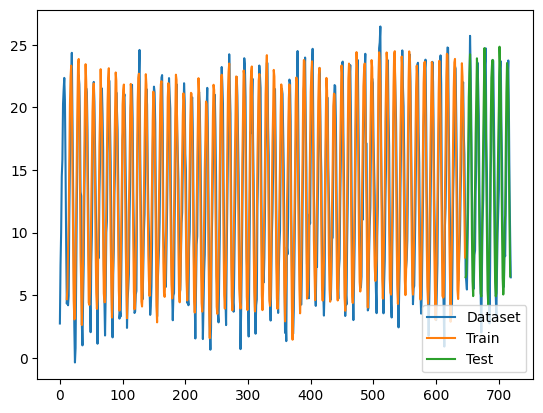

In [41]:
group_df["temp"].plot(label= "Dataset", legend=True)
pd.Series(np.concatenate((np.full(win-1, np.nan), mlp_train_predict[:, 0]))).plot(label= "Train", legend=True)
pd.Series(np.concatenate((np.full(len(train) - 1, np.nan), mlp_test_predict[:,0]))).plot(label= "Test", legend=True)

In [ ]:
### LSTM PREDICTION

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train.reshape(-1, 1))
scaled_train_data = scaler.transform(train.reshape(-1, 1))
scaled_test_data = scaler.transform(test.reshape(-1, 1))

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [50]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12 
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)



In [37]:
from sklearn.preprocessing import StandardScaler
std_train = train.reshape(len(train), 1)
std_trasf = StandardScaler()
std_trasf.fit(std_train)
std_train = std_trasf.transform(std_train)
generator = TimeseriesGenerator(std_train, std_train, length=n_input,batch_size=1)


In [46]:
std_test = std_trasf.transform(test.reshape(len(test), 1))

In [51]:
# init LSTM 
model = Sequential()
model.add(LSTM(64, activation="relu", input_shape =(n_input, n_features), dropout=0.1))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(generator,epochs=25)
model.summary()

Epoch 1/25
636/636 [==============================] - 4s 5ms/step - loss: 0.0400
Epoch 2/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0129
Epoch 3/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0103
Epoch 4/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0094
Epoch 5/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0071
Epoch 6/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0070
Epoch 7/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0079
Epoch 8/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0062
Epoch 9/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 10/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0059
Epoch 11/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0053
Epoch 12/25
636/636 [==============================] - 3s 5ms/step - loss: 0.0050
Epoch 13/25
636/636 [====

In [ ]:
# model evaluation
preds_std = list()
batch = std_train[-n_input:].reshape((1, n_input, n_features))

for _ in range(len(test)):
    pred = model.predict(batch)[0]
    preds_std.append(pred)
    batch = np.append(batch[:, 1:,:], [[pred]], axis = 1)

lstm_forecast = std_trasf.inverse_transform(preds_std)
lstm_forecast = np.transpose(lstm_forecast).squeeze()
mse(lstm_forecast, test)

In [81]:
mse(lstm_forecast, std_test[:, 0])

508.4575646610595

In [82]:
l = train.reshape(len(train),1)
a = train.reshape(-1,1)

In [ ]:
print( a)

In [ ]:
# model evaluation
preds_scaled = list()
batch = scaled_train_data[-n_input:].reshape((1, n_input, n_features))

for _ in range(len(test)):
    pred = model.predict(batch)[0]
    preds_scaled.append(pred)
    batch = np.append(batch[:, 1:,:], [[pred]], axis = 1)

lstm_forecast = scaler.inverse_transform(preds_scaled)
lstm_forecast = np.transpose(lstm_forecast).squeeze()
mse(lstm_forecast, test)

In [ ]:
### PLOT MLP VS LSTM

In [ ]:
labels = ["Test true", "LSTM predictions", "MLP predictions"]
for label, scores in zip(labels, [test, lstm_forecast, mlp_test_predict]):
    pd.Series(scores.flatten()).plot(label= label, legend = True)

In [ ]:
##### DIEBOLD-MARIANO TEST

In [47]:
from dm_test import dm_test

In [ ]:
mlp_test_predict

In [56]:
rt = dm_test(test, mlp_test_predict[:, 0], lstm_forecast, h=2, crit= "MSE")
t = 0.5
print("We accept H0" if rt.p_value > t else "We reject the H0 hypotesis")

We reject the H0 hypotesis


In [55]:
rt.p_value

4.366318000668768e-05

### RANDOM FOREST

In [ ]:
lookback = 12
dataset = pd.DataFrame()
for i in range(lookback, 0, -1):
    dataset['t-' + str(i)] = group_df["temp"].shift(i) # build dataset by columns
dataset['t'] = group_df["temp"].values
dataset = dataset[lookback:] # removes the first lookback columns
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
x_train, xtest = x[:-12], x[-12:]
y_train, ytest = y[:-12], y[-12:]
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror',
n_estimators=1000)
model.fit(x_train, y_train)
xg_preds= model.predict(xtest)
mse(xg_preds, ytest)

In [57]:
xg_preds= model.predict(xtest)

In [58]:
mse(xg_preds, ytest)

2.747637761638082

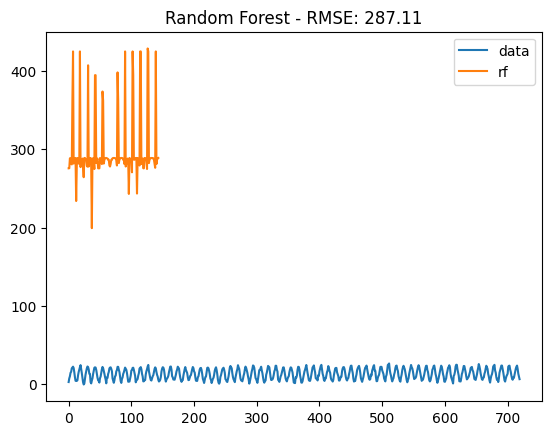

In [116]:
# random forest, ensemble with bagging
from sklearn.ensemble import RandomForestRegressor

train_size = int(len(group_df['temp']) * 0.8)
train_x = group_df['temp'][:train_size].values
test_x = group_df['temp'][train_size:].values
train_y = group_df['temp'][:train_size].index
test_y = group_df['temp'][train_size:].index

train_x = train_x.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)

rf_model = RandomForestRegressor(max_depth=2, n_estimators=100)
rf_model.fit(train_x, train_y)
rf_forecast = rf_model.predict(test_x)
#rf_forecast_series = pd.Series(invert_transformations(rf_forecast), index=y_test)
plt.plot(group_df['temp'], label='data')
plt.plot(rf_forecast, label='rf')
plt.title('Random Forest - RMSE: %.2f' % rmse(test_x.flatten(), rf_forecast))
plt.legend()


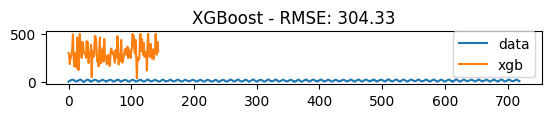

In [122]:
# XGBoost, ensemble with boosting
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror',
n_estimators=1000)
xgb_model.fit(train_x, train_y)
xgb_forecast = xgb_model.predict(test_x)
# xgb_forecast_series = pd.Series(invert_transformations(xgb_forecast), index=y_test)
plt.subplot(6, 1, 5)
plt.plot(group_df['temp'], label='data')
plt.plot(xgb_forecast, label='xgb')
plt.title('XGBoost - RMSE: %.2f' % rmse(test_x.flatten(), xgb_forecast))
plt.legend()

Bagging e Boosting sono entrambe tecniche di ensemble learning, che combinano più modelli di apprendimento per migliorare le prestazioni predittive e ridurre l'overfitting. Tuttavia, ci sono alcune differenze chiave tra le due approcci. Ecco una panoramica di Bagging e Boosting:

Bagging (Bootstrap Aggregating):

Campionamento Bootstrap: Nel Bagging, si costruiscono diversi sottoinsiemi di addestramento utilizzando il campionamento bootstrap. Questo implica il campionamento casuale con sostituzione da parte del set di addestramento originale per creare diversi sottoinsiemi di dati.

Addestramento Indipendente: Si addestrano modelli di apprendimento (ad esempio, alberi decisionali) su ciascun sottoinsieme di dati in modo indipendente. Ognuno di questi modelli può avere prestazioni leggermente diverse a causa della variazione introdotta dal campionamento bootstrap.

Voto o Media: Le predizioni finali sono ottenute votando (nel caso di classificazione) o facendo la media (nel caso di regressione) delle predizioni dei modelli indipendenti.

Esempi di algoritmi di Bagging includono il Random Forest.

Boosting:

Ponderazione dei Dati: Nel Boosting, i dati vengono ponderati in modo tale che gli errori compiuti dai modelli precedenti abbiano un impatto maggiore sui dati successivi.

Addestramento Sequenziale: I modelli sono addestrati in modo sequenziale, con ciascun modello che cerca di correggere gli errori compiuti dai modelli precedenti.

Addestramento Focalizzato sugli Errori: I dati mal classificati o mal predetti ricevono un peso maggiore nell'addestramento successivo, concentrandosi sui casi difficili.

Esempi di algoritmi di Boosting includono AdaBoost, Gradient Boosting, e XGBoost.

Differenze chiave:

Indipendenza dei Modelli: Nel Bagging, i modelli sono addestrati in modo indipendente, mentre nel Boosting i modelli sono addestrati in modo sequenziale e dipendente.

Pesi dei Dati: Nel Bagging, ogni modello ha lo stesso peso. Nel Boosting, i pesi sono assegnati in base agli errori precedenti.

Complessità dei Modelli: Il Bagging tende a utilizzare modelli ad alta varianza (come alberi decisionali profondi). Il Boosting cerca di ridurre la varianza combinando modelli più deboli in modo sequenziale.

Entrambe le tecniche possono portare a miglioramenti nelle prestazioni del modello, ma è importante selezionare la tecnica appropriata in base alla natura del problema e dei dati.